![Practicum AI Logo image](https://github.com/PracticumAI/practicumai.github.io/blob/main/images/logo/PracticumAI_logo_250x50.png?raw=true)
***
# *Practicum AI:* CNN - Convolution

This exercise adapted from Baig et al. (2020) <i>The Deep Learning Workshop</i> from <a href="https://www.packtpub.com/product/the-deep-learning-workshop/9781839219856">Packt Publishers</a> (Exercise 3.01, page 113).

(8 Minutes)

#### Introduction
The convolution operation is the foundation of convolutional neural networks. Here, we explore this operation with an input matrix and the convolutional filter or kernel. Note that the meaning of the term kernel as used here is very different and unrelated to the meaning when used in reference to the Python environment, or kernel we use to run our notebooks.


#### 1. Import packages for the notebook

In [7]:

%pip install opencv-python


     --------------------------------------- 38.6/38.6 MB 38.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

***
#### 2. Create a tensor for the *Input* matrix

The image below shows the input matrix, a 3x3 martrix that we'll call $A$, as well as the convolutional kernel to be applied to the input. The $*$ symbol is a special "convolution" symbol, not multiplication. 

![](images/02.1_convolution_image.jpg)

```python
A = tf.Variable([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A
```
<div style="padding: 10px;margin-bottom: 20px;border: thin solid #30335D;border-left-width: 10px;background-color: #fff">
   <p><strong>Note:</strong> You may get a lot of red output when you execute this code.  These are messages and warnings.  Don't be alarmed.  This is expected.  To remove the messages, right click on the block and then click Clear Outputs.</p>
</div>

In [3]:
# Code it!

A = tf.Variable([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

A

<tf.Variable 'Variable:0' shape=(3, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])>

#### 3. Create a tensor for the *Filter/Kernel* matrix

In this step, we create the kernel for the convolutional operation.  Note: we select the kernel's values here. But in our deep learning models, the neural network *learns* the values of these weights, or parameters, during training. 

A 3x3 convolutional kernel (the most commonly used size, largely selected after lots of trial and error) has 10 parameters to learn: nine for the nine cells of the kernel, and one for the bias term.  

```python
B = tf.Variable([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
B
```

In [4]:
# Code it!

B = tf.Variable([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

B

<tf.Variable 'Variable:0' shape=(3, 3) dtype=int32, numpy=
array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])>

#### 4. Perform an element-wise multiplication

The first step of the compution operation is to multiply the two matrices using `tf.math.multiply`, save the results to a variable, and then print the variable's contents.

```python
mult_out = tf.math.multiply(A, B)
mult_out
```

In [5]:
# Code it!

mult_out = tf.math.multiply(A, B)

mult_out

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 1,  0, -3],
       [ 4,  0, -6],
       [ 7,  0, -9]])>

#### 5. Perform an element-wise sum

The second step is to sum the elements, resulting in a single value of -6.

```python
conv_out = tf.math.reduce_sum(mult_out)
conv_out
```

In [6]:
# Code it!

conv_out = tf.math.reduce_sum(mult_out)

conv_out

<tf.Tensor: shape=(), dtype=int32, numpy=-6>

## Example: Convolving a sunflower image

In the previous section, our input matrix $A$ and convolutional kernel $B$ were the same size.  We now extend that example and work with a *real* photo while still using $B$ as our 3x3 kernel. 

Let's begin with a quick review. A convolution applies a kernel to an image, moving from top left to bottom right. The number of pixels the kernel slides over between each convolution is the **stride length**.  Stride length is an important and adjustable hyperparameter.  Additionally, the dimensionality of a convolution's output is reduced relative to the input.  This was the case earlier where a 3x3 matrix ended up as a single value (-6).  To avoid this, an input image can be **padded**, or surounded by a border of pixels. The values can be 0s (**zero padding**) or mirror the edge pixels of the input (same or **mirror padding**).  

But enough theory!  Let's do some real work and apply an edge detection filter to a sunflower image. To get started, we first redefine $B$, assigning values to it suitable for edge detection.  

In [7]:
# Also, test the blur filter (commented out below).
# B = tf.Variable([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9

# Values for detecting an edge.
B = tf.Variable([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
B

<tf.Variable 'Variable:0' shape=(3, 3) dtype=int32, numpy=
array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])>

Then we load an image of a sunflower and display it.

In [8]:
image = cv2.imread('images/02.1_sunflower_image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, figsize = (12,8))
plt.imshow(image)

: 

And finally, we use OpenCV's filter2D function to apply the filter to the image and display the original and convolved images.

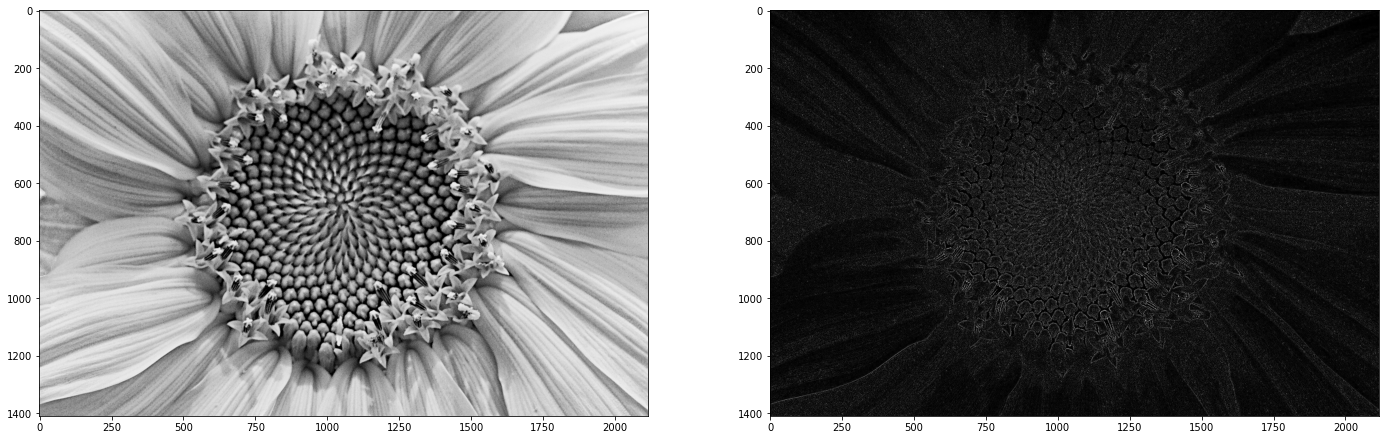

In [5]:
# Apply the convolution...

img = cv2.filter2D(image, -1, B.numpy())

fig, ax = plt.subplots(1,2,figsize = (24,16))

ax[0].imshow(image)
ax[1].imshow(img)